# Lecture 6: Bayesian Formalism Part II and Markov Chains
AM207: Verena Kaynig-Fittkau,and Pavlos Protopapas, Harvard University


In [31]:
%matplotlib inline
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('talk')

# Example Rainy - Sunny

We look at a very simple Markov Chain, with only two states: Rainy or Sunny. This chain is aperiodic and irreducible, so it has a stationary distribution. We find it by looking at powers of the transition matrix.

In [32]:
# the transition matrix for our chain
transition_matrix = np.array([[1./3., 2./3.],[0.5, 0.5]])

print transition_matrix
print 

# this is the 2 transition matrix
tm_2 = np.dot(transition_matrix, transition_matrix)
print tm_2
print 

# now for higher n. We should see that it converges to the
# stationary distribution
tm_before = tm_2
for i in range(5):
    tm_next = np.dot(tm_before, transition_matrix)
    print tm_next
    print
    tm_before = tm_next
    
# computing the 2 step transition from Rainy to Rainy for comparison
print 1./3.*1./3. + 2./3. * 0.5

# This is the true stationary distribution 
# Found by solving for the eigenvector sT=s
print [3./7., 4./7.]


[[ 0.33333333  0.66666667]
 [ 0.5         0.5       ]]

[[ 0.44444444  0.55555556]
 [ 0.41666667  0.58333333]]

[[ 0.42592593  0.57407407]
 [ 0.43055556  0.56944444]]

[[ 0.42901235  0.57098765]
 [ 0.42824074  0.57175926]]

[[ 0.42849794  0.57150206]
 [ 0.42862654  0.57137346]]

[[ 0.42858368  0.57141632]
 [ 0.42856224  0.57143776]]

[[ 0.42856939  0.57143061]
 [ 0.42857296  0.57142704]]

0.444444444444
[0.42857142857142855, 0.5714285714285714]


### Example: Markov Chain over Time

consider a life insurance company that wants to find out how much money to charge its clients. 
The company wants to estimate how long the clients will live. It proposes the following model summarizing the state of health of an individual on a monthly basis: healthy, sick and dead with transition graph shown in figure below 

![markov example](./Lecture06_data/Markov_ex1.png)

The transition matrix for this example is 
<div class="custom-class" align="center">
$$\left[ \begin{array}{ccc}
0.69 & 0.3 & 0.01 \\
0.8 & 0.1 & 0.1 \\
0 & 0 & 1 \end{array} \right] $$
</div>
If the probability vector for the initial state is $\mu(x^{(1)}) = (0.5, 0.2, 0.3)$ 
it follows that $\mu(x^{(1)})T =  (0.5050, 0.1700, 0.3250)$ and, after several iterations (multiplications by T ), the product will converge to $p(x) =(0.0178,0.0062,0.9760)$ [all dead].
No matter what initial distribution we use, the chain will stabilize at $p(x) = (0.0, 0.0, 1.0)$. 

When initializing each Markov chain, the chain will wander in state space around the
starting state. Therefore, if we start a number of chains, each with different initial conditions,
the chains will initially be in a state close to the starting state. This period is called the
__burnin__. An important property of Markov chains is that the starting state of the chain no
longer affects the state of the chain after a sufficiently long sequence of transitions (assuming
that certain conditions about the Markov chain are met). At this point, the chain is said
to reach its steady state and the states reflect samples from its stationary distribution. This
property that Markov chains converge to a stationary distribution regardless of where we
started (if certain regularity conditions of the transition function are met), is quite important.
When applied to MCMC, it allow us to draw samples from a distribution using a sequential
procedure but where the starting state of the sequence does not affect the estimation process.

[ 0.37926965  0.60986424  0.01086611]
[  8.73308982e-04   3.02231494e-04   9.98824460e-01]


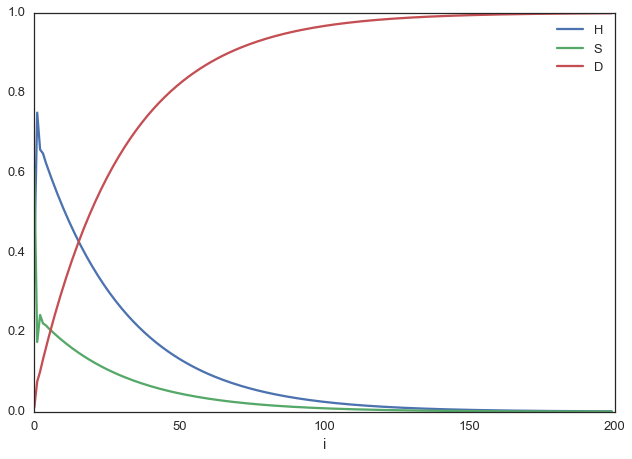

In [43]:
# Simple example for MARKOV CHAIN

# transition matrix
#T = np.array([[0.69, 0.3, 0.01],[ 0.8, 0.1, 0.1] ,[ 0,0.1 ,0.9]])
T = np.array([[0.69, 0.3, 0.01],[ 0.8, 0.1, 0.1] ,[ 0 , 0 ,1]])

# initial state USE RANDOM NUMBERS
p = np.random.uniform(low=0,high=1, size=3)
# normalize 
p = p/np.sum(p)

# do 100 iterations
q=np.zeros((200,3))
for i in np.arange(0,200):
    #compute probability for each state
    q[i, :] = np.dot(p,np.linalg.matrix_power(T,i))

plt.plot(q)
plt.xlabel('i')
plt.ylim(0,1.0)
plt.legend( ('H', 'S', 'D'))

print q[0]
print q[-1]

Let's show the same with sampling

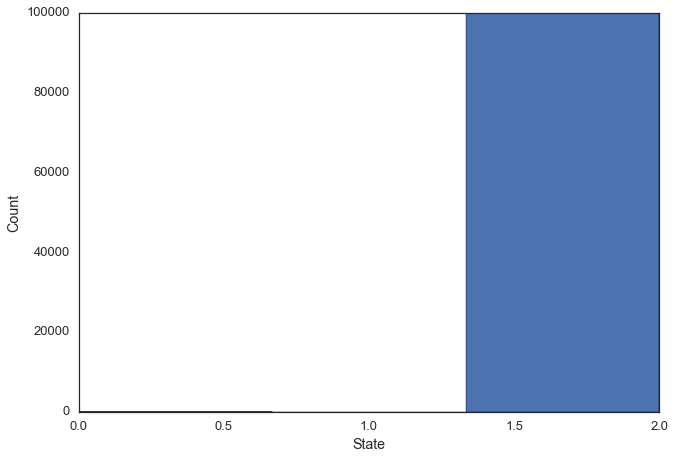

In [44]:
number_of_samples = 100000
samples = np.zeros(number_of_samples)

oldPosition = np.random.randint(low=0, high=3)
samples[0] = oldPosition

for i in xrange(number_of_samples-1):
    newPosition = np.random.choice(3,p=T[oldPosition])
    samples[i+1] = newPosition
    oldPosition = newPosition
    
samples_hist = plt.hist(samples, bins=3)
plt.xlabel("State")
plt.ylabel("Count")

In [30]:
print np.around(samples_hist[0]/np.double(number_of_samples), 3)

[ 0.536  0.206  0.257]


Note: We just took the samples right from the beginning. This is sloppy. As we can see in the graph above, the chain needs some iterations before it reaches its steady state. This part is considered the burn in and typically should just be thrown away. 